Некоторые распространенные примеры данных временных рядов включают цены на акции и исторические данные о погоде. Временные ряды также используются при мониторинге состояния здоровья пациента, например, при проведении электроэнцефалограммы (ЭЭГ), которая непрерывно измеряет нервную активность, и электрокардиограммы (ЭКГ), которая контролирует сердечную деятельность.

Классификация временных рядов используется для прогнозирования того, к какой категории относится временной ряд. На основе нескольких точек данных во временном ряду классификация временных рядов используется для определения класса, к которому относится весь временной ряд.

Используя tsfresh библиотеку Python, мы сначала извлекем тысячи статистических признаков для каждого временного ряда, включая дисперсию, асимметрию, стандартное отклонение и некоторые более сложные. Затем мы сохраним эти функции в табличном формате, отбросим несущественные функции и обучим модель машинного обучения на основе полученных данных.


Набор данных включает в себя определение того, перемещался ли человек из комнаты в комнату на основе временных рядов уровня радиосигнала (RSS) между узлами беспроводной сенсорной сети (WSN).

https://archive.ics.uci.edu/dataset/348/indoor+user+movement+prediction+from+rss+data

In [1]:
import os
import numpy as np
import pandas as pd

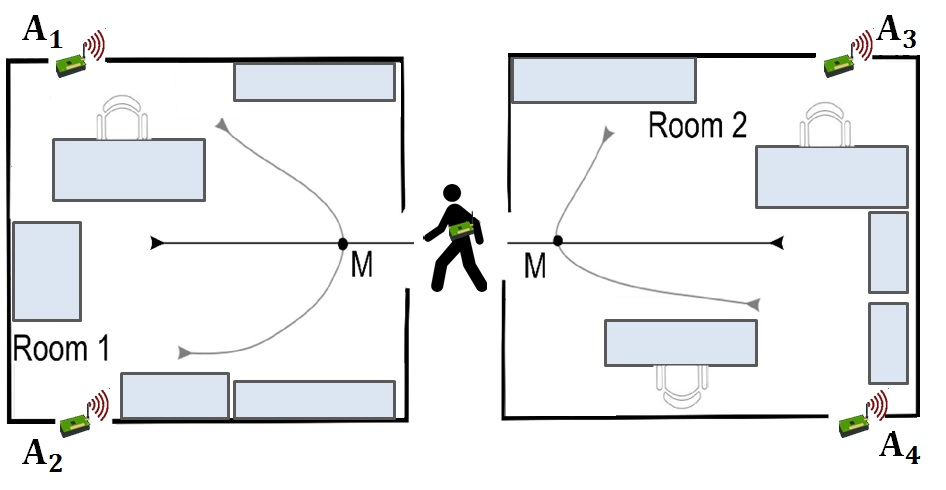

In [2]:
# !wget -r https://archive.ics.uci.edu/static/public/348/indoor+user+movement+prediction+from+rss+data.zip

In [3]:
# !mkdir data
# !unzip -u archive.ics.uci.edu/static/public/348/indoor+user+movement+prediction+from+rss+data.zip -d data

In [4]:
data_path = 'data/' # the root dataset path, change if necessary

target_df = pd.read_csv(os.path.join(data_path, 'dataset', 'MovementAAL_target.csv')) # read the labels CSV file

Столбец #sequence_ID представляет идентификатор каждой последовательности, и позже мы будем использовать этот идентификатор для ссылки на соответствующий последовательности CSV-файл временных рядов.

In [5]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   #sequence_ID  314 non-null    int64
 1    class_label  314 non-null    int64
dtypes: int64(2)
memory usage: 5.0 KB


In [6]:
target_df.columns

Index(['#sequence_ID', ' class_label'], dtype='object')

In [7]:
target_df[' class_label'].value_counts()

 class_label
 1    158
-1    156
Name: count, dtype: int64

In [8]:
labels = target_df[' class_label']
labels.rename('class_label', inplace=True) # remove the leading whitespace

0      1
1      1
2      1
3      1
4      1
      ..
309   -1
310   -1
311   -1
312   -1
313   -1
Name: class_label, Length: 314, dtype: int64

In [9]:
sequence_ids = target_df['#sequence_ID']

In [10]:
from sklearn.model_selection import train_test_split
train_ids, test_ids, train_labels, test_labels = train_test_split(sequence_ids, labels, test_size=0.2)

In [11]:
X_train = pd.DataFrame()
X_test = pd.DataFrame()

In [12]:
for i, sequence in enumerate(train_ids):
    df = pd.read_csv(os.path.join(data_path, 'dataset', f'MovementAAL_RSS_{sequence}.csv'))
    df.insert(0, 'sequence', i)
    df['step'] = np.arange(df.shape[0]) # creates a range of integers starting from 0 to the number of the measurements.
    X_train = pd.concat([X_train, df])

for i, sequence in enumerate(test_ids):
    df = pd.read_csv(os.path.join(data_path, 'dataset', f'MovementAAL_RSS_{sequence}.csv'))
    df.insert(0, 'sequence', i)
    df['step'] = np.arange(df.shape[0])
    X_test = pd.concat([X_test, df])

In [13]:
X_train.describe()

,sequence,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4,step
count,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,124.701466,-0.067357,-0.144867,-0.166713,-0.083537,23.834618
std,71.545494,0.440798,0.446015,0.486987,0.439274,17.659039
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,63.000000,-0.377780,-0.466670,-0.571430,-0.404260,10.000000
50%,125.000000,-0.045455,-0.155560,-0.142860,-0.063830,21.000000
75%,184.000000,0.200000,0.179490,0.136360,0.234040,35.000000
max,250.000000,1.000000,1.000000,1.000000,1.000000,128.000000


In [14]:
X_train.columns

Index(['sequence', '#RSS_anchor1', ' RSS_anchor2', ' RSS_anchor3',
       ' RSS_anchor4', 'step'],
      dtype='object')

Теперь мы будем использовать tsfresh библиотеку Python для извлечения объектов.

Следующий код сгенерирует полный набор функций, включающий более 3000 функций. Параметр column_id - это столбец, указывающий, к какому временному ряду относится измерение. Параметр column_sort используется для сортировки измерений для каждого временного ряда. Однако нам это не нужно, поскольку набор данных уже содержит измерения в хронологическом порядке. Выполнение кода занимает около 1-2 минут.

In [19]:
# pip install tsfresh

In [15]:
from tsfresh import extract_features

extracted_features = extract_features(X_train, column_id='sequence', column_sort='step')

Feature Extraction: 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]


In [21]:
extracted_features.head()

,RSS_anchor2__variance_larger_than_standard_deviation,RSS_anchor2__has_duplicate_max,RSS_anchor2__has_duplicate_min,RSS_anchor2__has_duplicate,RSS_anchor2__sum_values,RSS_anchor2__abs_energy,RSS_anchor2__mean_abs_change,RSS_anchor2__mean_change,RSS_anchor2__mean_second_derivative_central,RSS_anchor2__median,...,#RSS_anchor1__fourier_entropy__bins_5,#RSS_anchor1__fourier_entropy__bins_10,#RSS_anchor1__fourier_entropy__bins_100,#RSS_anchor1__permutation_entropy__dimension_3__tau_1,#RSS_anchor1__permutation_entropy__dimension_4__tau_1,#RSS_anchor1__permutation_entropy__dimension_5__tau_1,#RSS_anchor1__permutation_entropy__dimension_6__tau_1,#RSS_anchor1__permutation_entropy__dimension_7__tau_1,#RSS_anchor1__query_similarity_count__query_None__threshold_0.0,#RSS_anchor1__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,1.0,1.0,-6.240000,3.539200,0.111429,0.008571,-0.001481,-0.200000,...,1.077573,1.709473,2.303488,1.614725,2.344618,2.865235,2.947005,3.014947,NaN,0.945577
1,0.0,1.0,1.0,1.0,12.538464,9.711376,0.232820,-0.001026,-0.004710,0.230770,...,0.990475,1.231974,2.811419,1.372644,2.206762,2.834604,3.217929,3.535416,NaN,0.828571
2,0.0,0.0,0.0,1.0,4.360000,1.675200,0.168421,0.021053,0.011111,0.200000,...,1.033562,1.414279,2.271869,1.175629,1.762315,2.252728,2.488328,2.540036,NaN,0.482993
3,0.0,0.0,0.0,1.0,-5.711093,7.428649,0.246744,-0.016858,-0.001170,-0.066667,...,0.672591,0.978362,2.383678,1.081443,1.666422,2.264221,2.812907,3.270816,NaN,0.863636
4,0.0,0.0,0.0,1.0,0.040000,0.980800,0.213913,0.001739,0.013636,0.080000,...,1.090599,1.631345,2.351673,1.641230,2.532591,2.926418,2.944439,2.890372,NaN,0.333330


In [16]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
train_labels = train_labels.reset_index() # reset the index
features_filtered = select_features(extracted_features, train_labels['class_label'])

/Users/stureiko/miniforge3/envs/otus/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns [' RSS_anchor2__fft_coefficient__attr_"real"__coeff_65'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_66'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_67'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_68'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_69'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_70'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_71'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_72'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_73'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_74'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_75'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_76'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_77'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_78'
 ' RSS_anchor2__fft_coefficient__attr_"real"__coeff_79'
 ' RSS_anchor2__fft_

In [17]:
features_filtered

,"RSS_anchor3__linear_trend__attr_""pvalue""","RSS_anchor3__fft_coefficient__attr_""abs""__coeff_1",RSS_anchor3__variance,RSS_anchor3__standard_deviation,RSS_anchor3__autocorrelation__lag_3,RSS_anchor3__longest_strike_above_mean,RSS_anchor3__approximate_entropy__m_2__r_0.9,RSS_anchor3__fourier_entropy__bins_2,RSS_anchor4__autocorrelation__lag_7,RSS_anchor3__autocorrelation__lag_8,...,RSS_anchor3__kurtosis,RSS_anchor3__ar_coefficient__coeff_1__k_10,#RSS_anchor1__fourier_entropy__bins_2,RSS_anchor2__autocorrelation__lag_4,"RSS_anchor3__fft_coefficient__attr_""abs""__coeff_7",RSS_anchor4__permutation_entropy__dimension_6__tau_1,#RSS_anchor1__autocorrelation__lag_1,#RSS_anchor1__partial_autocorrelation__lag_1,"RSS_anchor3__agg_autocorrelation__f_agg_""var""__maxlag_40","#RSS_anchor1__agg_linear_trend__attr_""stderr""__chunk_len_10__f_agg_""max"""
0,7.428517e-07,7.102818,0.119284,0.345375,0.720640,10.0,0.322398,0.304636,-0.590939,0.083618,...,-1.439970,0.385461,0.184907,0.292521,1.293191,2.022035,0.545417,0.545417,0.234976,0.026112
1,2.603043e-03,3.014990,0.086564,0.294218,0.365797,15.0,0.470821,0.304636,-0.236104,-0.354037,...,-1.045666,0.654561,0.398307,0.320756,2.184564,3.109700,0.720079,0.720079,0.185561,0.093413
2,3.203046e-14,13.069583,0.161989,0.402478,0.793409,18.0,0.300165,0.158411,0.393022,0.678494,...,-1.506975,0.246318,0.348832,0.609367,1.397615,3.237969,0.851764,0.851764,0.481892,0.025848
3,7.703056e-02,4.076745,0.072029,0.268383,0.364638,10.0,0.541140,0.348832,0.236738,-0.186360,...,-1.257569,0.179240,0.529706,0.098874,1.288840,3.170148,0.708319,0.708319,0.069466,0.059297
4,5.639941e-07,7.855605,0.109524,0.330943,0.316733,10.0,0.373020,0.146145,0.039410,0.162195,...,-0.422970,0.361452,0.146145,0.237697,0.870423,2.839413,0.878883,0.878883,0.104346,0.042269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,8.571968e-01,4.574495,0.044679,0.211374,0.305682,11.0,0.443356,0.295439,0.121225,0.064543,...,1.227740,0.530396,0.387212,0.597198,1.919757,2.844022,0.641075,0.641075,0.139859,0.011185
247,2.460869e-09,7.226334,0.132093,0.363446,0.509028,7.0,0.419967,0.146145,0.455039,0.307029,...,0.085735,0.581776,0.244930,0.620886,3.455945,2.451886,0.671772,0.671772,0.092194,0.045949
248,7.591786e-03,2.344358,0.051562,0.227072,-0.029187,6.0,0.653983,0.376770,0.026599,-0.199009,...,-0.617869,0.242809,0.482578,0.117031,0.927593,3.218876,0.468928,0.468928,0.081567,0.109974
249,4.651790e-01,3.107722,0.065211,0.255365,0.226589,8.0,0.645660,0.325083,0.273292,-0.359177,...,-0.605721,0.416459,0.422709,-0.275666,1.215230,2.955533,0.612971,0.612971,0.104733,0.196864


In [18]:
test_features =  extract_features(X_test, column_id='sequence', column_sort='step')
impute(test_features)

Feature Extraction: 100%|██████████| 23/23 [00:05<00:00,  4.52it/s]
/Users/stureiko/miniforge3/envs/otus/lib/python3.10/site-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['#RSS_anchor1__fft_coefficient__attr_"real"__coeff_35'
 '#RSS_anchor1__fft_coefficient__attr_"real"__coeff_36'
 '#RSS_anchor1__fft_coefficient__attr_"real"__coeff_37' ...
 ' RSS_anchor4__friedrich_coefficients__coeff_3__m_3__r_30'
 ' RSS_anchor4__max_langevin_fixed_point__m_3__r_30'
 ' RSS_anchor4__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


,#RSS_anchor1__variance_larger_than_standard_deviation,#RSS_anchor1__has_duplicate_max,#RSS_anchor1__has_duplicate_min,#RSS_anchor1__has_duplicate,#RSS_anchor1__sum_values,#RSS_anchor1__abs_energy,#RSS_anchor1__mean_abs_change,#RSS_anchor1__mean_change,#RSS_anchor1__mean_second_derivative_central,#RSS_anchor1__median,...,RSS_anchor4__fourier_entropy__bins_5,RSS_anchor4__fourier_entropy__bins_10,RSS_anchor4__fourier_entropy__bins_100,RSS_anchor4__permutation_entropy__dimension_3__tau_1,RSS_anchor4__permutation_entropy__dimension_4__tau_1,RSS_anchor4__permutation_entropy__dimension_5__tau_1,RSS_anchor4__permutation_entropy__dimension_6__tau_1,RSS_anchor4__permutation_entropy__dimension_7__tau_1,RSS_anchor4__query_similarity_count__query_None__threshold_0.0,RSS_anchor4__mean_n_absolute_max__number_of_maxima_7
0,0.0,1.0,1.0,1.0,-21.761910,18.043082,0.120877,-0.010989,0.000952,-0.809520,...,0.895333,1.430685,2.540036,1.759685,2.708312,3.014947,3.028029,3.044522,0.0,0.600000
1,0.0,1.0,0.0,1.0,8.866638,4.759977,0.136842,0.005848,0.001802,0.244440,...,0.871133,0.983600,2.137793,0.854891,1.353317,1.794505,2.344460,2.857838,0.0,0.761900
2,0.0,1.0,0.0,1.0,6.142840,2.972777,0.238095,-0.004762,0.001253,0.333330,...,1.240684,1.546599,2.397895,1.634167,2.370135,2.751667,2.772589,2.708050,0.0,0.600000
3,0.0,0.0,0.0,1.0,4.644433,3.044438,0.085470,0.003419,0.000000,0.200000,...,0.315396,0.573516,2.049986,1.066826,1.750125,2.487725,3.018925,3.374314,0.0,0.482993
4,0.0,1.0,1.0,1.0,-4.772753,5.580573,0.142046,0.022727,0.000000,-0.045455,...,0.270641,0.404510,2.195992,1.306335,2.109027,2.805523,3.268530,3.557505,0.0,0.829790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.0,0.0,1.0,1.0,-15.238070,11.541914,0.129871,0.038961,-0.012472,-0.714290,...,1.011404,1.445186,2.369382,1.696882,2.622996,2.871476,2.890372,2.833213,0.0,0.757143
59,0.0,0.0,0.0,1.0,4.619031,3.222223,0.303571,-0.029762,-0.004141,0.190480,...,0.793730,0.793730,2.031759,1.589950,2.323397,2.755550,2.926418,2.944439,0.0,0.985714
60,0.0,0.0,0.0,1.0,-6.333323,3.728869,0.091357,-0.009054,0.000000,-0.200000,...,0.490450,0.804507,2.453151,1.131899,1.746482,2.400062,2.960979,3.337030,0.0,0.782310
61,0.0,0.0,1.0,1.0,6.428570,2.968245,0.152881,-0.032581,0.017196,0.357140,...,0.600166,0.885574,1.972247,1.695865,2.313154,2.772589,2.708050,2.639057,0.0,0.728571


In [19]:
test_features_filtered = test_features[features_filtered.columns]

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(features_filtered, train_labels['class_label'])

RandomForestClassifier(n_estimators=1000)

In [30]:
from sklearn.metrics import accuracy_score
predict_labels = rf.predict(test_features_filtered)
print(accuracy_score(test_labels, predict_labels))

0.9047619047619048


In [31]:
print(classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

          -1       0.94      0.88      0.91        34
           1       0.87      0.93      0.90        29

    accuracy                           0.90        63
   macro avg       0.90      0.91      0.90        63
weighted avg       0.91      0.90      0.90        63



https://iq.opengenus.org/time-series-classification/